In [1]:
print('多层神经网络。sequential and module')



多层神经网络。sequential and module


In [2]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def plot_decision_boundary(model, x, y):
    # set min and max values and give it some padding
    x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
    y_min, y_max = x[:,1].min()-1, x[:,1].max()+1 #???
    h = 0.01
    # generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # plot the contour and training examples
    plt.contourf(xx, yy, Z, camp=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:,0], x[:,1], c=y.reshape(-1), s = 40, cmap=plt.cm.Spectral)


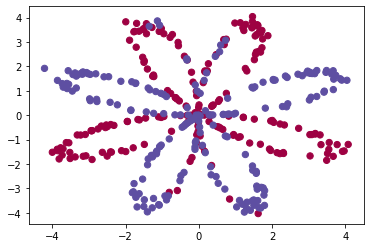

In [14]:
np.random.seed(1)
m = 400
N = int(m/2)
D = 2
x = np.zeros((m,D))
y = np.zeros((m,1), dtype='uint8')
a = 4
for j in range(2):
    ix = range(N*j, N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N)+np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t)+np.random.randn(N)*0.2 #radius
    x[ix]=np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix]=j

plt.scatter(x[:,0], x[:,1], c=y.reshape(-1),s=40,cmap=plt.cm.Spectral)


In [15]:
# 尝试logistic 方法
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()
w = nn.Parameter(torch.randn(2,1))
b = nn.Parameter(torch.zeros(1))
optimizer = torch.optim.SGD([w,b], 1e-1)
def logistic_regression(x):
    return torch.mm(x, w) + b
criterion = nn.BCEWithLogitsLoss()


In [16]:
for e in range(100):
    out = logistic_regression(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(e+1)%20==0:
        print('epoch: {}, loss: {}'.format(e+1, loss.item()))


epoch: 20, loss: 0.9289243221282959
epoch: 40, loss: 0.6777273416519165
epoch: 60, loss: 0.6732586026191711
epoch: 80, loss: 0.6731584668159485
epoch: 100, loss: 0.6731501221656799


In [23]:
# plot logistic
def plot_logistic(x):
    x = Variable(torch.from_numpy(x).float())
    out = torch.sigmoid(logistic_regression(x))
    
    out = (out>0.5)*1
    return out.data.numpy()


d:\projects\pyprojects\learnpy\venv\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'camp'
  if sys.path[0] == '':


Text(0.5, 1.0, 'logsitic regression')

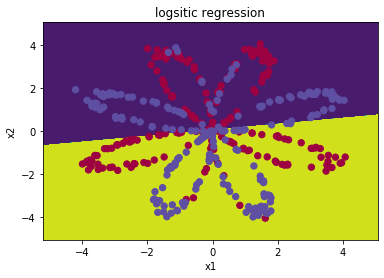

In [24]:
plot_decision_boundary(lambda x: plot_logistic(x), x.numpy(), y.numpy())
plt.title('logsitic regression')

In [27]:
# 定义2层的神经网络
w1 = nn.Parameter(torch.randn(2,4)*0.01)
b1 = nn.Parameter(torch.zeros(4))
w2 = nn.Parameter(torch.randn(4,1)*0.01)
b2 = nn.Parameter(torch.zeros(1))
# 定义模型
def  two_network(x):
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1, w2) + b2
    return x2
optimizer = torch.optim.SGD([w1, w2, b1, b2], 1.)
criterion = nn.BCEWithLogitsLoss()


In [28]:
for e in range(10000):
    out = two_network(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e+1)% 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.item()))


d:\projects\pyprojects\learnpy\venv\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch: 1000, loss: 0.2855307459831238
epoch: 2000, loss: 0.2723928689956665
epoch: 3000, loss: 0.2652212977409363
epoch: 4000, loss: 0.26036131381988525
epoch: 5000, loss: 0.25689390301704407
epoch: 6000, loss: 0.25432834029197693
epoch: 7000, loss: 0.25236958265304565
epoch: 8000, loss: 0.2508336901664734
epoch: 9000, loss: 0.24960169196128845
epoch: 10000, loss: 0.24859437346458435


In [33]:
def plot_network(x):
    x = Variable(torch.from_numpy(x).float())
    x1 = torch.mm(x,w1) + b1
    x1 = torch.tanh(x1)
    x2 = torch.mm(x1,w2) +b2
    out = torch.sigmoid(x2)
    out = (out>0.5)*1
    return out.data.numpy()


d:\projects\pyprojects\learnpy\venv\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'camp'
  if sys.path[0] == '':


Text(0.5, 1.0, '2 layer network')

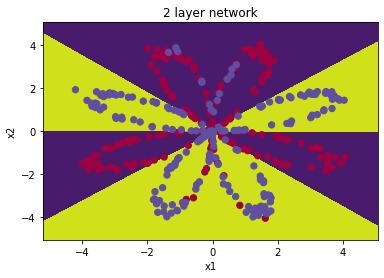

In [34]:
plot_decision_boundary(lambda x: plot_network(x), x.numpy(), y.numpy())
plt.title('2 layer network')


In [35]:
seq_net = nn.Sequential(
    nn.Linear(2,4),
    nn.Tanh(),
    nn.Linear(4,1))


In [36]:
seq_net[0]

Linear(in_features=2, out_features=4, bias=True)

In [37]:
w0 = seq_net[0].weight
print(w0)

Parameter containing:
tensor([[-0.2632, -0.0842],
        [-0.7040, -0.2120],
        [ 0.1855, -0.6999],
        [-0.6028, -0.3291]], requires_grad=True)


In [39]:
#获取模型的参数
param = seq_net.parameters()
# 定义优化器
optim = torch.optim.SGD(param,1.)
for e in range(10000):
    out = seq_net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e+1)%1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.item()))


epoch: 1000, loss: 0.2717759311199188
epoch: 2000, loss: 0.26479628682136536
epoch: 3000, loss: 0.2600526511669159
epoch: 4000, loss: 0.256666362285614
epoch: 5000, loss: 0.2541579604148865
epoch: 6000, loss: 0.25223931670188904
epoch: 7000, loss: 0.25073182582855225
epoch: 8000, loss: 0.24952028691768646
epoch: 9000, loss: 0.2485279142856598
epoch: 10000, loss: 0.24770157039165497


d:\projects\pyprojects\learnpy\venv\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'camp'
  if sys.path[0] == '':


Text(0.5, 1.0, 'sequential')

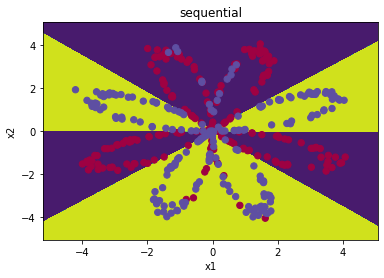

In [40]:
def plot_seq(x):
    out = torch.sigmoid(seq_net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out>0.5)*1
    return out
plot_decision_boundary(lambda x: plot_seq(x), x.numpy(), y.numpy())
plt.title('sequential')


In [41]:
# 模型和参数保存在一起
torch.save(seq_net, 'save_seq_net.pth')

In [42]:
seq_net1 = torch.load('save_seq_net.pth')

In [43]:
seq_net1

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [44]:
print(seq_net1[0].weight)

Parameter containing:
tensor([[-10.6733,  13.3388],
        [-10.4734, -12.2352],
        [ -0.0446,  -8.1065],
        [ -0.5858,  -2.0709]], requires_grad=True)


In [45]:
# 只保存参数
torch.save(seq_net.state_dict(),'save_seq_net_params.pth')
seq_net2 = nn.Sequential(
    nn.Linear(2,4),
    nn.Tanh(),
    nn.Linear(4,1))
seq_net2.load_state_dict(torch.load('save_seq_net_params.pth'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [46]:
seq_net2

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [47]:
print(seq_net2[0].weight)

Parameter containing:
tensor([[-10.6733,  13.3388],
        [-10.4734, -12.2352],
        [ -0.0446,  -8.1065],
        [ -0.5858,  -2.0709]], requires_grad=True)


In [48]:
class module_net(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        super(module_net, self).__init__()
        self.layer1 = nn.Linear(num_input, num_hidden)
        self.layer2 = nn.Tanh()
        self.layer3 = nn.Linear(num_hidden, num_output)
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x



In [49]:
mo_net = module_net(2,4,1)

In [50]:
l1 = mo_net.layer1
print(l1)

Linear(in_features=2, out_features=4, bias=True)


In [51]:
print(l1.weight)

Parameter containing:
tensor([[ 0.3639, -0.1645],
        [ 0.0377,  0.0451],
        [ 0.2423, -0.4000],
        [ 0.2610, -0.3594]], requires_grad=True)


In [52]:
# 优化器
optim = torch.optim.SGD(mo_net.parameters(),1.)
for e in range(10000):
    out = mo_net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e+1)%1000 == 0:
        print('epoch: {}, loss:{}'.format(e+1, loss.item()))
        


epoch: 1000, loss:0.28881222009658813
epoch: 2000, loss:0.2488444447517395
epoch: 3000, loss:0.23546738922595978
epoch: 4000, loss:0.22904323041439056
epoch: 5000, loss:0.22491273283958435
epoch: 6000, loss:0.22191233932971954
epoch: 7000, loss:0.2195841670036316
epoch: 8000, loss:0.21770627796649933
epoch: 9000, loss:0.21616052091121674
epoch: 10000, loss:0.21487054228782654


In [53]:
torch.save(mo_net.state_dict(), 'module_net.pth')

d:\projects\pyprojects\learnpy\venv\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'camp'
  if sys.path[0] == '':


Text(0.5, 1.0, 'module net')

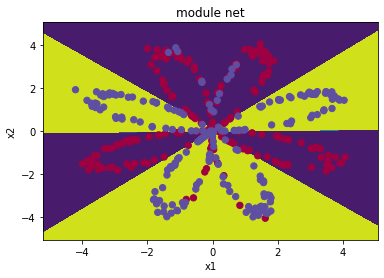

In [54]:
def plot_mo(x):
    out = torch.sigmoid(mo_net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out>0.5)*1
    return out
plot_decision_boundary(lambda x: plot_mo(x), x.numpy(), y.numpy())
plt.title('module net')

In [56]:
# 更深的网络
net = nn.Sequential(
    nn.Linear(2,10),
    nn.Tanh(),
    nn.Linear(10,10),
    nn.Tanh(),
    nn.Linear(10,10),
    nn.Tanh(),
    nn.Linear(10,1))
optim = torch.optim.SGD(net.parameters(), 0.1)
for e in range(20000):
    out = net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e+1)%1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.item()))

        

epoch: 1000, loss: 0.3109420835971832
epoch: 2000, loss: 0.2637443244457245
epoch: 3000, loss: 0.22435717284679413
epoch: 4000, loss: 0.206673264503479
epoch: 5000, loss: 0.19891664385795593
epoch: 6000, loss: 0.19382910430431366
epoch: 7000, loss: 0.1897098571062088
epoch: 8000, loss: 0.18649591505527496
epoch: 9000, loss: 0.1836165487766266
epoch: 10000, loss: 0.18095847964286804
epoch: 11000, loss: 0.17857256531715393
epoch: 12000, loss: 0.17635947465896606
epoch: 13000, loss: 0.17410729825496674
epoch: 14000, loss: 0.1716422140598297
epoch: 15000, loss: 0.16893859207630157
epoch: 16000, loss: 0.16610300540924072
epoch: 17000, loss: 0.16330528259277344
epoch: 18000, loss: 0.16073328256607056
epoch: 19000, loss: 0.15844735503196716
epoch: 20000, loss: 0.15633723139762878


d:\projects\pyprojects\learnpy\venv\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'camp'
  if sys.path[0] == '':


Text(0.5, 1.0, 'Sequential ')

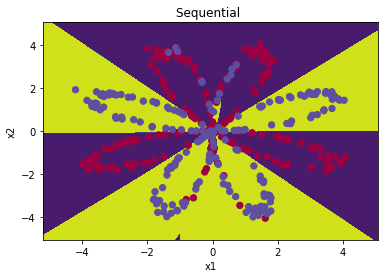

In [57]:
def plot_net(x):
    out = torch.sigmoid(net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out>0.5)*1
    return out
plot_decision_boundary(lambda x: plot_net(x), x.numpy(), y.numpy())
plt.title('Sequential ')